### Reading and Cleaning Data

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv", on_bad_lines="skip")

In [ ]:
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
rating_map = {1: '-1', 2: '-1', 3: '0', 4: '1', 5: '1'}

df['Sentiment Category'] = df['Sentiment'].map(rating_map)
df = df.drop(['Sentiment'], axis=1)

In [ ]:
df.head()

,Review,Sentiment Category
0,Fast shipping but this product is very cheaply...,-1
1,This case takes so long to ship and it's not e...,-1
2,Good for not droids. Not good for iPhones. You...,-1
3,The cable was not compatible between my macboo...,-1
4,The case is nice but did not have a glow light...,-1


In [ ]:
# Check for Missing Values
df.isnull().sum()

,0
Review,1
Sentiment Category,0


In [ ]:
# Drop rows with any missing values
df.dropna(inplace=True)

In [ ]:
#remove Punctuation and numbers from our data
import re
def remove_punctuation(s):
    return re.sub('[^A-Za-z ]','',s)
df['Review'] = df['Review'].apply(lambda x:remove_punctuation(x))

In [ ]:
# Remove Duplicates
df['Review'] = df['Review'].str.lower()

df.drop_duplicates(subset='Review', inplace=True)

### Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.20, random_state=42)

In [ ]:
# resetting index of pandas data_frame to 0 based index
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
# Convert the 'Sentiment Category' column to integer type for training and testing labels
y_train = train['Sentiment Category'].astype(int)
y_test = test['Sentiment Category'].astype(int)

In [ ]:
train.head()

,Review,Sentiment Category
0,i have not been prompted to write a review for...,-1
1,i arrived broken one part of the navigation b...,-1
2,prosbr supports many book formatsbr has nice...,0
3,plmr way shielded marine waterproof speaker mu...,0
4,this thing doesnt work at all not only did it ...,-1


### Implementing CountVectorizer Model From sklearn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',ngram_range=(1,4),max_features=20000)
train_cv = cv.fit_transform(train['Review'])

In [ ]:
# transform our test data into countvectorizer matrix.
test_cv = cv.transform(test['Review'])

In [ ]:
print(cv.get_feature_names_out()[:50])

['aa' 'aa batteries' 'aaa' 'aaa batteries' 'aaa battery' 'ab' 'ability'
 'ability play' 'ability record' 'ability use' 'able' 'able access'
 'able adjust' 'able change' 'able charge' 'able charge phone'
 'able connect' 'able control' 'able download' 'able figure' 'able fit'
 'able fix' 'able hear' 'able hear music' 'able hold' 'able install'
 'able just' 'able listen' 'able listen music' 'able make' 'able pair'
 'able pick' 'able play' 'able play music' 'able plug' 'able program'
 'able push' 'able read' 'able recharge' 'able record' 'able remove'
 'able resolve' 'able return' 'able set' 'able turn' 'able upload'
 'able use' 'able use device' 'able view' 'able work']


### Using TfIdfTransformer From sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer()

In [ ]:
train_tfidf = tf_transformer.fit_transform(train_cv)
test_tfidf = tf_transformer.transform(test_cv)

## Model Training

### Logistic Regression

In [ ]:
import mord as m

In [ ]:
logistic_model = m.LogisticAT()

logistic_model.fit(train_tfidf,y_train)

LogisticAT()

### Use TF-IDF feature for Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

logistic_y_train_pred = logistic_model.predict(train_tfidf)
logistic_y_test_pred = logistic_model.predict(test_tfidf)

logistic_train_accuracy = accuracy_score(y_train, logistic_y_train_pred)
print(f'Logistic Train Accuracy: {logistic_train_accuracy * 100:.2f}%')

logistic_test_accuracy = accuracy_score(y_test, logistic_y_test_pred)
print(f'Logistic Test Accuracy: {logistic_test_accuracy * 100:.2f}%')

print("Classification Report for Test Data:")
print(classification_report(y_test, logistic_y_test_pred))

Logistic Train Accuracy: 75.75%
Logistic Test Accuracy: 66.05%
Classification Report for Test Data:
              precision    recall  f1-score   support

          -1       0.80      0.71      0.75      2040
           0       0.30      0.44      0.36       944
           1       0.80      0.71      0.75      1935

    accuracy                           0.66      4919
   macro avg       0.63      0.62      0.62      4919
weighted avg       0.70      0.66      0.68      4919



### GridsearchCV for Support Vector Machine

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Define your parameter grid
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 5],
#     'gamma': ['scale', 'auto']
# }

# grid_search = GridSearchCV(SVC(), param_grid, cv=4, scoring='accuracy', verbose=1, n_jobs=-1)

# grid_search.fit(train_tfidf, y_train)

# # Best parameters from the grid search
# print("Best Parameters:", grid_search.best_params_)

# # Get the best model
# best_svm_model = grid_search.best_estimator_

# # Save the best model and best parameters to a file using pickle
# with open('best_svm_model.pkl', 'wb') as f:
#     pickle.dump(best_svm_model, f)

# with open('best_params_.pkl', 'wb') as f:
#     pickle.dump(grid_search.best_params_, f)

# print("Model and best parameters saved successfully.")

In [ ]:
# Load the model and best parameters
with open('/content/best_svm_model.pkl', 'rb') as f:
    best_svm_model = pickle.load(f)

with open('/content/best_params_.pkl', 'rb') as f:
    best_params_ = pickle.load(f)

print(f"Best Parameters: {best_params_}")

# Make predictions on the training and test data
svm_y_train_pred = best_svm_model.predict(train_tfidf)
svm_y_test_pred = best_svm_model.predict(test_tfidf)

# train accuracy
svm_train_accuracy = accuracy_score(y_train, svm_y_train_pred)
print(f"Train Accuracy: {svm_train_accuracy * 100:.2f}%")

# test accuracy
svm_test_accuracy = accuracy_score(y_test, svm_y_test_pred)
print(f"Test Accuracy: {svm_test_accuracy * 100:.2f}%")

# Print classification report for test data
print("Classification Report of Best Model:")
print(classification_report(y_test, svm_y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Train Accuracy: 95.91%
Test Accuracy: 71.25%
Classification Report of Best Model:
              precision    recall  f1-score   support

          -1       0.72      0.86      0.78      2040
           0       0.48      0.14      0.21       944
           1       0.73      0.84      0.78      1935

    accuracy                           0.71      4919
   macro avg       0.64      0.61      0.59      4919
weighted avg       0.68      0.71      0.67      4919



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(train_tfidf,y_train)

MultinomialNB()

In [ ]:
nb_y_train_pred = nb_model.predict(train_tfidf)
nb_y_test_pred = nb_model.predict(test_tfidf)

nb_train_accuracy = accuracy_score(y_train, nb_y_train_pred)
print("Train Accuracy of Naive Bayes Model:", nb_train_accuracy)

nb_test_accuracy = accuracy_score(y_test, nb_y_test_pred)
print("Test Accuracy of Naive Bayes Model:", nb_test_accuracy)

print("Classification Report of Naive Bayes Model:")
print(classification_report(y_test, nb_y_test_pred))

Train Accuracy of Naive Bayes Model: 0.7414993646759848
Test Accuracy of Naive Bayes Model: 0.6960764383004676
Classification Report of Naive Bayes Model:
              precision    recall  f1-score   support

          -1       0.71      0.86      0.78      2040
           0       0.63      0.01      0.02       944
           1       0.68      0.86      0.76      1935

    accuracy                           0.70      4919
   macro avg       0.67      0.58      0.52      4919
weighted avg       0.68      0.70      0.63      4919



### Comparative Analysis of Models and Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Visualizing Train and Test Accuracy for Logistic Classifier, SVM and Naive bayes

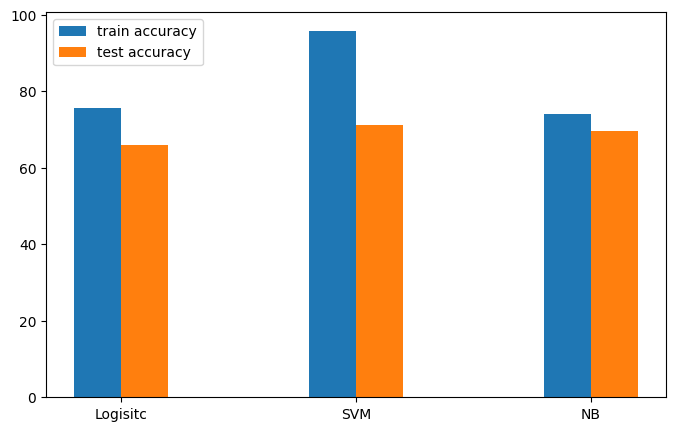

In [ ]:
plt.figure(figsize=(8,5))
width = 0.2
idx = np.arange(3)
plt.bar(idx, [logistic_train_accuracy*100, svm_train_accuracy*100, nb_train_accuracy*100], width, label='train accuracy')
plt.bar(idx + width, [logistic_test_accuracy*100, svm_test_accuracy*100, nb_test_accuracy*100], width, label='test accuracy')
plt.xticks(idx + width / 2, ('Logisitc', 'SVM', 'NB'))
plt.legend(loc="upper left")

### Visualizing Confusion Metrix for Logistic Classifier, SVC and Naive bayes

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
logistic_cm = confusion_matrix(y_test, logistic_y_test_pred,labels=[-1,0,1])
logistic_cmd = ConfusionMatrixDisplay(logistic_cm, display_labels=[-1,0,1])
svm_cm = confusion_matrix(y_test, svm_y_test_pred,labels=[-1,0,1])
svm_cmd = ConfusionMatrixDisplay(svm_cm, display_labels=[-1,0,1])
nb_cm = confusion_matrix(y_test, nb_y_test_pred,labels=[-1,0,1])
nb_cmd = ConfusionMatrixDisplay(nb_cm, display_labels=[-1,0,1])

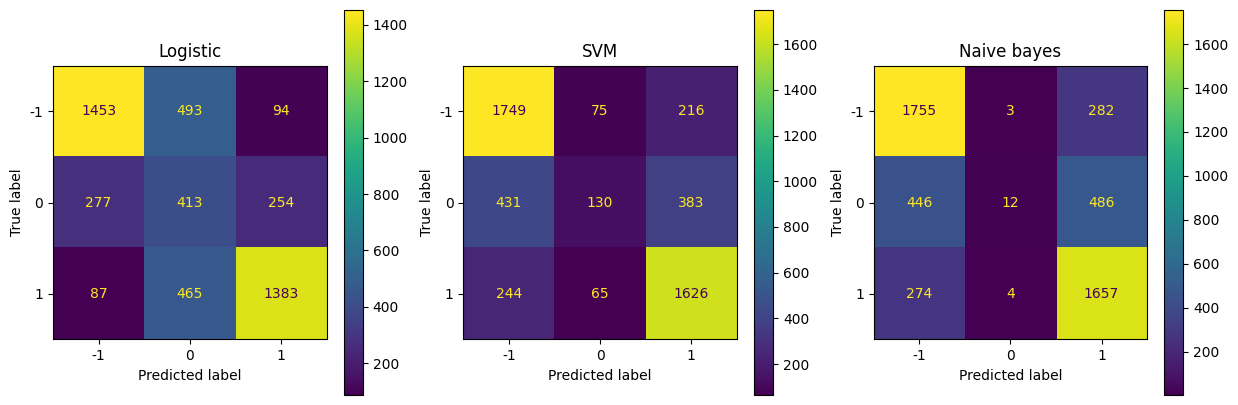

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].set_title("Logistic")
ax[1].set_title("SVM")
ax[2].set_title("Naive bayes")
logistic_cmd.plot(ax=ax[0])
svm_cmd.plot(ax=ax[1])
nb_cmd.plot(ax=ax[2])

In [ ]:
svm_clf_report = classification_report(y_test, svm_y_test_pred,  output_dict=True)
logistic_clf_report = classification_report(y_test, logistic_y_test_pred, output_dict=True)
nb_clf_report = classification_report(y_test, nb_y_test_pred, output_dict=True)

logistic_clf_report_df = pd.DataFrame(logistic_clf_report).transpose().drop(['support'], axis=1).drop(['macro avg', 'weighted avg'])
svm_clf_report_df = pd.DataFrame(svm_clf_report).transpose().drop(['support'], axis=1).drop(['macro avg', 'weighted avg'])
nb_clf_report_df = pd.DataFrame(nb_clf_report).transpose().drop(['support'], axis=1).drop(['macro avg', 'weighted avg'])

report_df = pd.concat([logistic_clf_report_df, svm_clf_report_df, nb_clf_report_df], axis=1, keys=['Logistic', 'SVM', 'NB'])

In [ ]:
report_df

Logistic                           SVM                      \
         precision    recall  f1-score precision    recall  f1-score   
-1         0.79967  0.712255  0.753435  0.721535  0.857353  0.783602   
0          0.30124  0.437500  0.356803  0.481481  0.137712  0.214168   
1          0.79896  0.714729  0.754501  0.730787  0.840310  0.781731   
accuracy   0.66050  0.660500  0.660500  0.712543  0.712543  0.712543   

                NB                      
         precision    recall  f1-score  
-1        0.709091  0.860294  0.777409  
0         0.631579  0.012712  0.024922  
1         0.683299  0.856331  0.760092  
accuracy  0.696076  0.696076  0.696076

### Using BERT Model

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification
import torch

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("MarieAngeA13/Sentiment-Analysis-BERT")
model = AutoModelForSequenceClassification.from_pretrained("MarieAngeA13/Sentiment-Analysis-BERT")

tokenizer_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/944 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))-1

In [ ]:
sentiment_score(df['Review'].iloc[3])

-1

In [ ]:
result = train['Review'].iloc[0:1000].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
print(classification_report(y_train.iloc[0:1000], result))

              precision    recall  f1-score   support

          -1       0.54      0.93      0.69       378
           0       0.13      0.22      0.16       202
           1       0.00      0.00      0.00       420

    accuracy                           0.40      1000
   macro avg       0.22      0.39      0.28      1000
weighted avg       0.23      0.40      0.29      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Analysis on Bert Results
- I have loaded pretrained bert model for sentiment analysis. Which predicts sentiment of given text into three category (positive, negative and neutral)
- When predecited on 1000 sample size data its performing very poorly without any dataset specific training. This can be improved further by training pre-trained bert with our training data.
- Challenge: Bert training and prediction was taking significant time. Due to time limitation I was not able to train it on our dataset for product reviews.